Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/evaluate/plot_decision_regions.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy

Sebastian Raschka 
last updated: 2016-02-11 

CPython 3.5.1
IPython 4.0.3

matplotlib 1.5.0
numpy 1.10.4
scipy 0.16.0


In [1]:
%matplotlib inline

# Plotting Decision Regions

A function for plotting decision regions of classifiers in 1 or 2 dimensions.

> from mlxtend.evaluate import plot_decision_regions

### References

- 

# Examples

## Example 1 - Decision regions in 2D

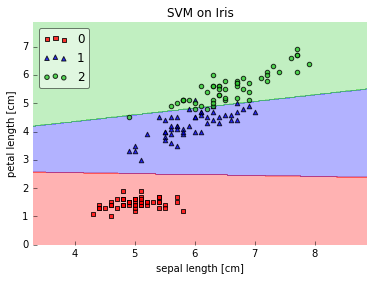

In [3]:
from mlxtend.evaluate import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X,y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, res=0.02, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Example 2 - Decision regions in 1D

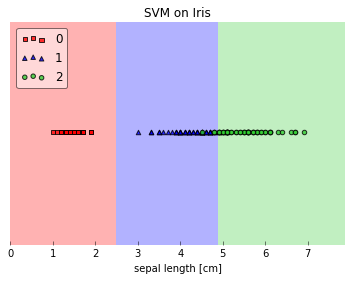

In [4]:
from mlxtend.evaluate import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, 2]
X = X[:, None]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X,y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, res=0.02, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.title('SVM on Iris')

plt.show()

## Example 3 - Decision Region Grids

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = SVC()

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

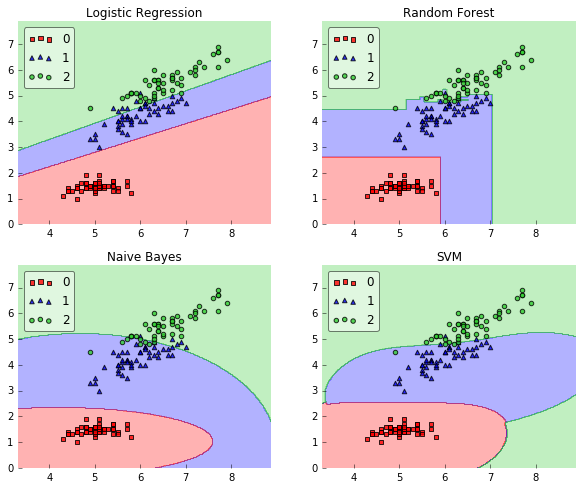

In [6]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM'],
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

## Example 4 - Highlighting Test Data Points

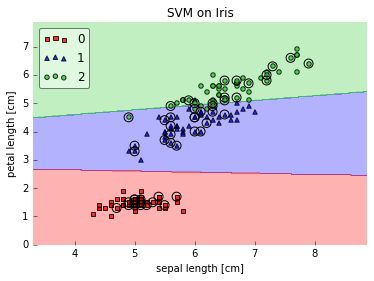

In [5]:
from mlxtend.evaluate import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC


# Loading some example data
iris = datasets.load_iris()
X, y = iris.data[:, [0,2]], iris.target
X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=3)

X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, res=0.02, legend=2, X_highlight=X_test)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Example 5 - Evaluating Classifier Behavior on Non-Linear Problems

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()
clf4 = SVC()

In [ ]:
# Loading Plotting Utilities
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.evaluate import plot_decision_regions
import numpy as np

### XOR

In [5]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int)

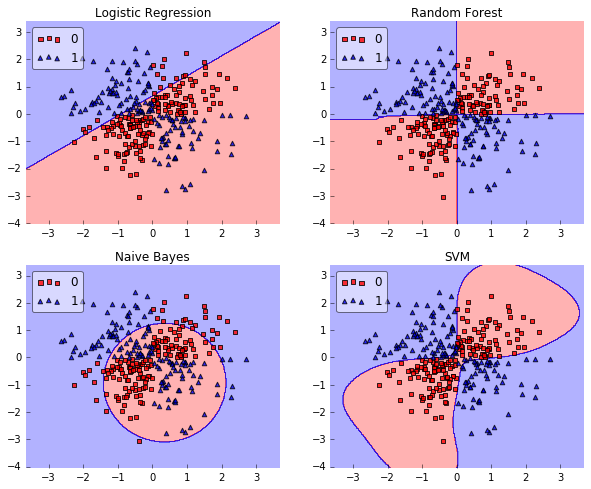

In [6]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM'],
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Half-Moons

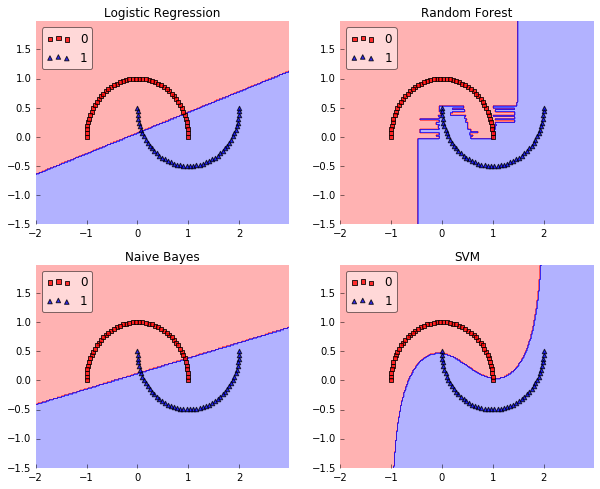

In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM'],
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Concentric Circles

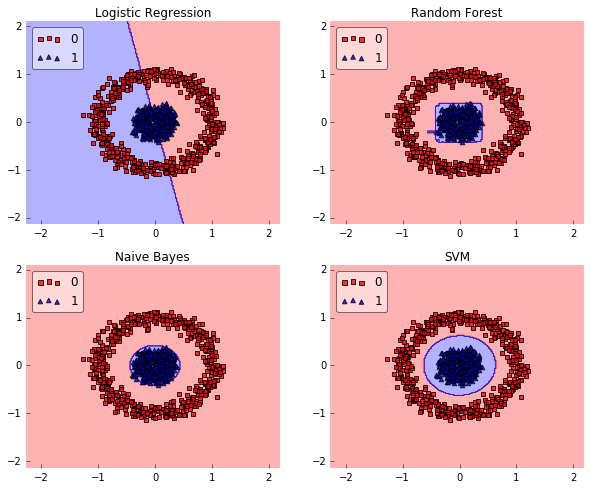

In [8]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM'],
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

# API

In [8]:
with open('../../api_modules/mlxtend.evaluate/plot_decision_regions.md', 'r') as f:
    print(f.read())

## plot_decision_regions

*plot_decision_regions(X, y, clf, X_highlight=None, res=0.02, legend=1, hide_spines=True, markers='s^oxv<>', colors=['red', 'blue', 'limegreen', 'gray', 'cyan'])*

Plot decision regions of a classifier.

**Parameters**

- `X` : array-like, shape = [n_samples, n_features]

    Feature Matrix.

- `y` : array-like, shape = [n_samples]

    True class labels.

- `clf` : Classifier object.

    Must have a .predict method.

- `X_highlight` : array-like, shape = [n_samples, n_features] (default: None)

    An array with data points that are used to highlight samples in `X`.

- `res` : float (default: 0.02)

    Grid width. Lower values increase the resolution but
    slow down the plotting.

- `hide_spines` : bool (default: True)

    Hide axis spines if True.

- `legend` : int (default: 1)

    Integer to specify the legend location.
    No legend if legend is 0.

- `markers` : list

    Scatterplot markers.

- `colors` : list

    Colors.

**Returns**

- `fig` : m